# Introduction 
Employee retention is very important as acquiring new employees can be quite expensive and time consuming. Therefore, understanding why employees leave is very important for the business to maximize efficiency and reduce training cost. 

The objective of this analysis is to come up with best possible classification which could be used to predict if a certain employee is going to leave.



## Reasons why employees quit:
1. Worklife balance
2. Bad managers/colleague
3. Social pressure 
4. Better opportunities
5. Personal reasons 

## Objective 
1. To use pandas to load the Kaggle Employee Retention Analystics
2. To explore and understand the dataset
    2.1 Viewing the data 
    2.2 Profile leaving employees
    2.3 Correlation Analysis 
3. Department Analysis 
   3.1 Leaving employees by department 
   3.2 Analysis of Sales Department leaving 
4. To predict the retention of employees - Prediction analysis 
   4.1 Support Vector Machine(SVM)
   4.2 Decision Tree Analysis 
5. Comparing models and discuss improvements 
6. Challenges:
   6.1 Finding the optimum effective wage to prevent high rollers to not leave the company 
   6.2 Comaparison with other companies job perks for an analysis of labour market offering
   6.3 Profiling employees for leadership succession/promotion
   

# # Data acquisition
The dataset was downloaded from Kaggle 
From Kaggle description:
1. satisfaction_level (0–1)
2. last_evaluation (Time since last evaluation in years)
3. number_projects (Number of projects completed while at work)
4. average_monthly_hours (Average monthly hours at workplace)
5. time_spend_company (Time spent at the company in years)
6. Work_accident (Whether the employee had a workplace accident)
7. left (Whether the employee left the workplace or not (1 or 0))
8. promotion_last_5years (Whether the employee was promoted in the 9.last five years)
10. sales (Department in which they work for)
11. salary (Relative level of salary)

In [1]:
import pandas as pd
data = pd.read_csv('turnover.csv')

In [2]:
col_names = data.columns.tolist()
print(col_names) # to print column names 

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data = data.rename(columns = {'sales':'department'}) #to rename sales column to department 

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [7]:
data.isnull() #to find any null values 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [8]:
data.shape

(14999, 10)

In [9]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
import numpy as np 
data['department'] = np.where(data['department'] == 'support','technical',data['department'])# to combine "technical", "suport","IT " under "technical"
data['department'] = np.where(data['department'] == 'IT','technical',data['department'])

# Data Exploration 

In [11]:
data['left'].value_counts()# since left contains 0 and 1s as values the results shows the count values into two categories

0    11428
1     3571
Name: left, dtype: int64

The above values show that 3571 employees left and 11428 stayed with the company.

In [12]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


The following are the observations made
1. The average satisfaction level of employees who stayed with the company is higher than that of the employees who left 
2. The average monthly work hours of the employess who left is more than that of the employees who stayed 
3. The employees who had workplace accidents are ledd likely to leave than that of the employee who did not have workplace accidents
4. The employees who were promoted in the last five years are less likely to leave thna those who did not get a promotion in the last five years 

In [13]:
data.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [14]:
data.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


# Data Visualization


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

### Bar chart for department employee work for and the frequency of turnover 

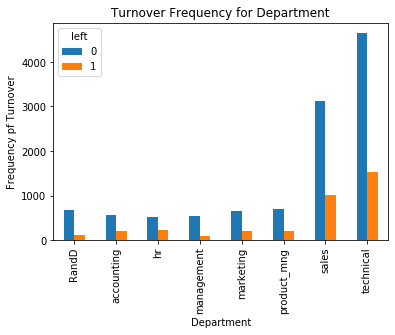

In [16]:
pd.crosstab(data.department, data.left).plot(kind ='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency pf Turnover')
plt.savefig('department_bar_chart')

The bar graph shows that the frequency of employee turnover depends greatly on the department they work for. Therefore, department can be a good predictor of the outcome variable.

### Bar chart for employee salary level and the frequency of turnover

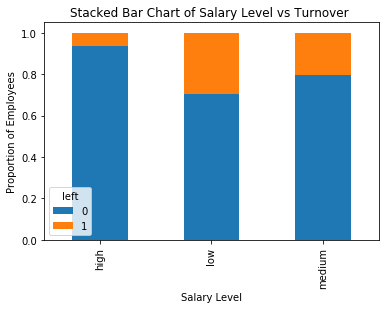

In [17]:
table=pd.crosstab(data.salary, data.left)# crosstab with salary makes up the rows and left makes up the columns 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)#table.sum returns the sum of the values and converts it to float  
plt.title('Stacked Bar Chart of Salary Level vs Turnover ')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')#shows the chart 

Employee trunover depends highly on salary level which proves that salary level can be another good predictor in predicting the outcome.

### Histogram of numeric variables 

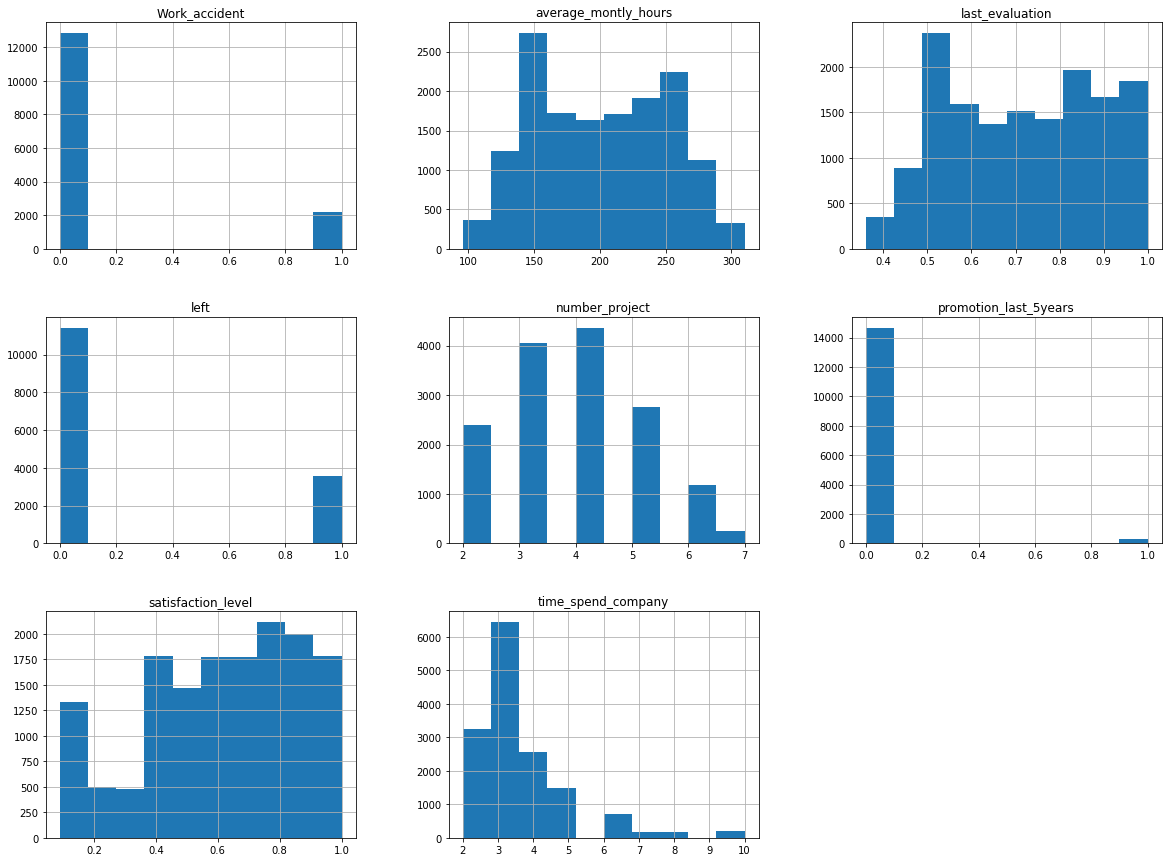

In [18]:
num_bins = 10 
data.hist(bins=num_bins,figsize=(20,15))
plt.savefig("data_histogram_plots")


## Creating Dummy Variable for Categorical Variables
The dataset contains to categorical variables which are deparmtent and salary. These need to be converted to dummy variables before modelling

In [19]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+ '_'+ var
    cat_list=pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [20]:
data.drop(data.columns[[8,9]], axis=1, inplace=True)# droping the columns converted into proper columns 
data.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [21]:
data_vars=data.columns.values.tolist() # the outcome varaiable is "left" and all the other variables are predictors 
y=['left']
x=[i for i in data_vars if i not in y]

## Feature Selection 

Selecting which variables are significant in predicting employee turnover wth great accuracy. Lets choose 10 columns out of the total of 18 columns

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe= RFE(model, 10)
rfe= rfe.fit(data[x], data[y])
print(rfe.support_)# returns support array which has a list of true and false values 
print(rfe.ranking_)# returns ranking array with ranks

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


RFE chose 10 variables which are marked True in the support array and marked with choice 1 in the ranking array.

In [27]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
x=data[cols]
y=data['left']

In [25]:
y.shape

(14999,)

In [28]:
x.shape

(14999, 10)

## Logistic Regression Model

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state = 0)

from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(x_test))))

Logistic regression accuracy: 0.771


 We get Logistic regression accuracy: 0.771

## Random Forest 


In [33]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(x_test))))

Random Forest Accuracy: 0.978


We get Random Forest Accuracy: 0.978

In [36]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
print('Support Vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))

Support Vector machine accuracy: 0.907


We get Support Vector machine accuracy: 0.907

## Cross Validation 
Cross validation will performed to avoid overfitting along with producing a prediction for eac observation dataset. In this case, 10-fold cross-validation to train Random Forest

In [38]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,x_train, y_train, cv=kfold, scoring = scoring )
print("10-fold cross validation average accuracy: %.3f" %(results.mean()))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.982


We get 10-fold cross validation average accuracy: 0.982

## Precision and Recall

Visualize predictions made by the classifier and evaluate the accuracy

### Random Forest

In [39]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



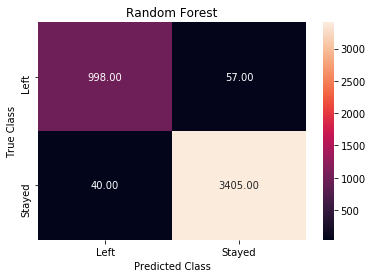

In [40]:
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns 
forest_cm = metrics.confusion_matrix(y_pred, y_test,[1,0])
sns.heatmap(forest_cm,annot=True,fmt ='.2f',xticklabels =["Left","Stayed"],yticklabels = ["Left", "Stayed"])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Random Forest')
plt.savefig('random_forest')

### Logistic Regression 

In [41]:
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



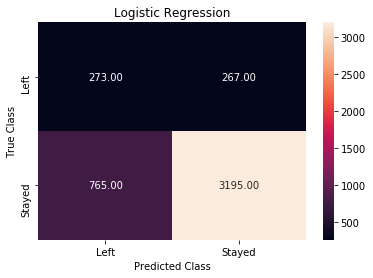

In [44]:
logreg_y_pred = logreg.predict(x_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test,[1,0])
sns.heatmap(logreg_cm, annot=True, fmt ='.2f', xticklabels = ["Left", "Stayed"], yticklabels = ["Left", "Stayed"])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

### Support Vector Machine

In [46]:
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3462
           1       0.77      0.85      0.81      1038

    accuracy                           0.91      4500
   macro avg       0.86      0.89      0.87      4500
weighted avg       0.91      0.91      0.91      4500



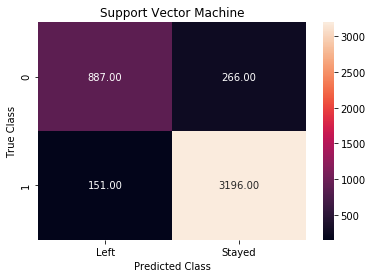

In [47]:
svc_y_pred = svc.predict(x_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test,[1,0])
sns.heatmap(svc_cm, annot = True , fmt ='.2f', xticklabels = ["Left", "Stayed"])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

Out of all the turnover classes, random forest predicted with the accuracy 95% by correctly predicting 991 out 1038. This means that the turnover recall of about 95% is far better than logistic regression which is about 26% or for support vector machine 85%.

Recall is when how often does the classifier predict an event correctly.
Precision is when a classifier predicts an event will happen, how often does that happen.

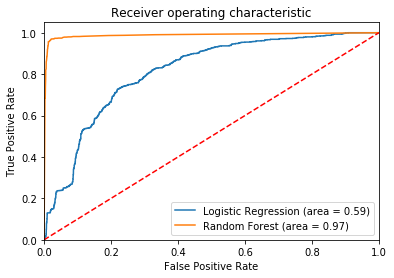

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

Receiver Operating Characteristic(ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier, a good classifier stays as far away from that line as possible(toward the top-left corner)

## Feature Importance for Random Forest Model 

In [50]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_ # returns features based on importance 
feature_indexes_by_importance = importance.argsort()# sorts features  
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.23%
promotion_last_5years-0.24%
department_hr-0.27%
department_RandD-0.33%
salary_high-0.67%
salary_low-1.13%
Work_accident-1.45%
last_evaluation-18.60%
time_spend_company-26.56%
satisfaction_level-50.51%


As per the Random Forest model, the above shows the most important features which influence whether an employee will leave the company, in ascending order. 
It shows that satisfaction level has the highest level of importance in predicting if an employee will leave. Whereas, department_management has the least importance.